In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
data = pd.read_csv(r"C:\Users\USER\Downloads\mock_kaggle.csv")

In [4]:
np.random.seed(42)
months = pd.date_range(start='2020-01-01', periods=48, freq='M')
trend = np.linspace(200, 350, 48)
seasonality = 20 * np.sin(np.linspace(0, 4 * 2 * np.pi, 48))
noise = np.random.normal(0, 15, 48)
sales = trend + seasonality + noise
data = pd.DataFrame({'Date': months, 'Sales': sales})
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_35376\726177781.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01-01', periods=48, freq='M')


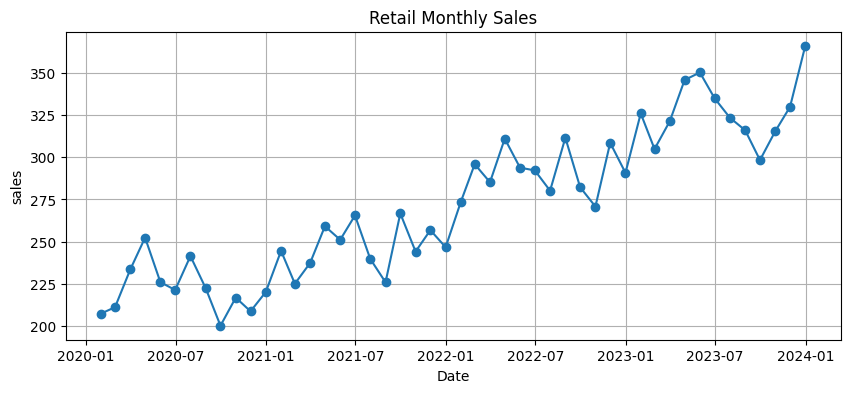

In [5]:
# Visualise sales data
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Sales'], marker = 'o')
plt.title('Retail Monthly Sales')
plt.xlabel('Date')
plt.ylabel('sales')
plt.grid(True)
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

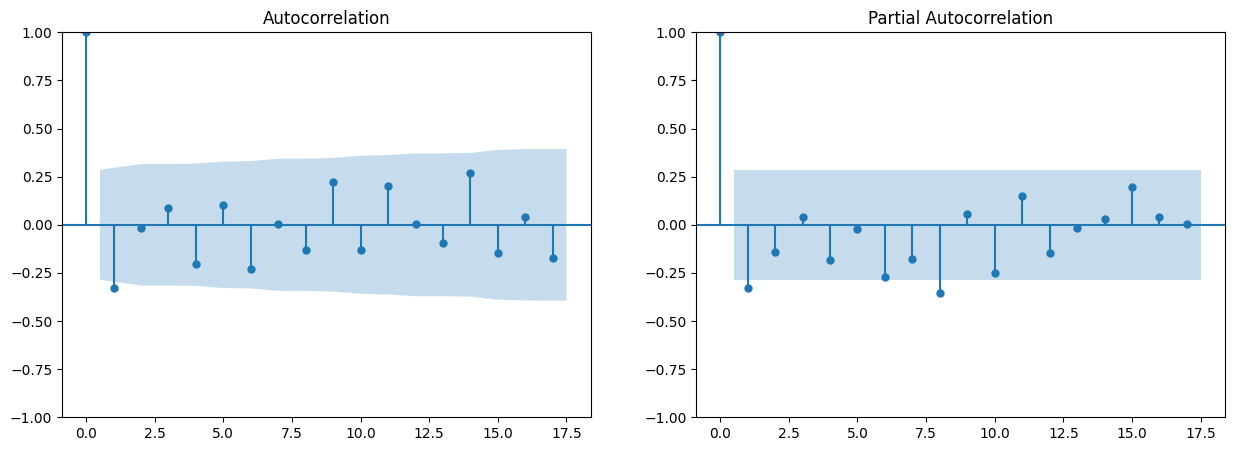

In [41]:
# Plot ACF and PACF to identify SARIMA parameeters
diff_sales = data['Sales'].diff().dropna()
fig, axes = plt.subplots(1,2,figsize=(15,5))
plot_acf(diff_sales, ax=axes[0])
plot_pacf(diff_sales, ax=axes[1])
plt.show()

In [44]:
#  Split data into training and testing sets (Last six months test) 
train = data.iloc[:-6]
test = data.iloc[-6:]

In [45]:
# Define and fit the SARIMA model
model= SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
model.fit = model.fit(disp=False)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [46]:
# Forecast the sales for the test period
forecast = model.fit.forecast(steps=6)

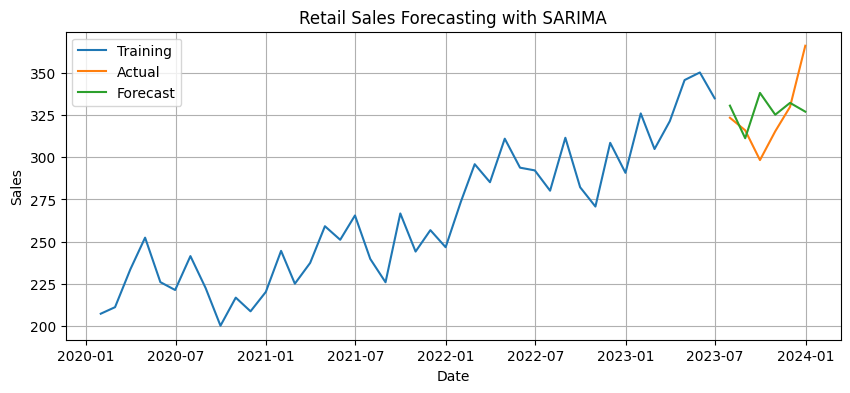

In [47]:
# Visualize the forecast vs actual sales
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Sales'], label='Training')
plt.plot(test.index, test['Sales'],label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title('Retail Sales Forecasting with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Evaluate forecast performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Sales'], forecast)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 17.12
